In [2]:
import pandas as pd
import numpy as np
import os
from pathlib import Path
import matplotlib.pyplot as plt
import sys
import sys
sys.path.append("..")
from utils import *
from scipy.fft import fft

In [15]:
df = load_amb_sin_data("../amb_sin/sine_fx_69Hz_0RPM.txt")

In [16]:
df

datetime        ax        ay        bx        by  \
3     2019-03-24 00:28:30.185757 -0.000028 -0.000004 -0.000057  0.000007   
4     2019-03-24 00:28:30.185952 -0.000028 -0.000004 -0.000055  0.000006   
5     2019-03-24 00:28:30.186147 -0.000027 -0.000004 -0.000054  0.000006   
6     2019-03-24 00:28:30.186343 -0.000026 -0.000005 -0.000052  0.000005   
7     2019-03-24 00:28:30.186538 -0.000025 -0.000004 -0.000051  0.000005   
...                          ...       ...       ...       ...       ...   
56327 2019-03-24 00:28:41.184780 -0.000026 -0.000003 -0.000053  0.000004   
56328 2019-03-24 00:28:41.184976 -0.000026 -0.000004 -0.000054  0.000005   
56329 2019-03-24 00:28:41.185171 -0.000027 -0.000003 -0.000055  0.000004   
56330 2019-03-24 00:28:41.185366 -0.000026 -0.000004 -0.000056  0.000004   
56331 2019-03-24 00:28:41.185561 -0.000026 -0.000003 -0.000056  0.000004   

           f_ax      f_ay      f_bx      f_by      e_ax      e_ay      e_bx  \
3      1.990753  1.832029  5.940073  0.975047  3.217506 -0.000310  2.933204   
4      2.096023  1.900670  5.114642  0.881740  2.653595 -0.000200  2.432144   
5      1.865702  1.633681  5.574122  0.403521  2.075296 -0.000269  1.914038   
6      1.932728  1.423755  5.333080  0.447821  1.487027 -0.000328  1.382410   
7      1.958310  1.926240  5.043597  0.444541  0.894002 -0.000404  0.840937   
...         ...       ...       ...       ...       ...       ...       ...   
56327  1.784844  1.657826  4.892091  0.882337  5.830850 -0.000248  5.218071   
56328  1.855697  1.816262  4.671357  0.533314  5.432043 -0.000189  4.872153   
56329  1.969572  1.655879  5.081287  0.778877  4.994026 -0.000349  4.491532   
56330  2.053569  1.681223  5.433907  0.854145  4.520874 -0.000285  4.078403   
56331  1.776701  2.031877  5.343660  1.086041  4.015437 -0.000378  3.636170   

           e_by  
3      0.002952  
4      0.002972  
5      0.002969  
6      0.003051  
7      0.002997  
...         ...  
56327  0.002929  
56328  0.002913  
56329  0.002883  
56330  0.002928  
56331  0.002996  

[56320 rows x 13 columns]

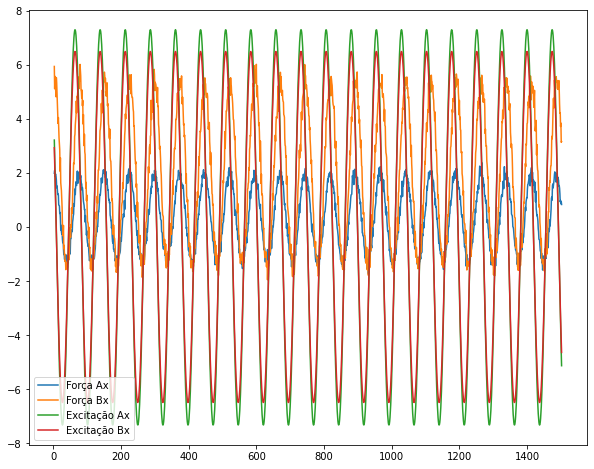

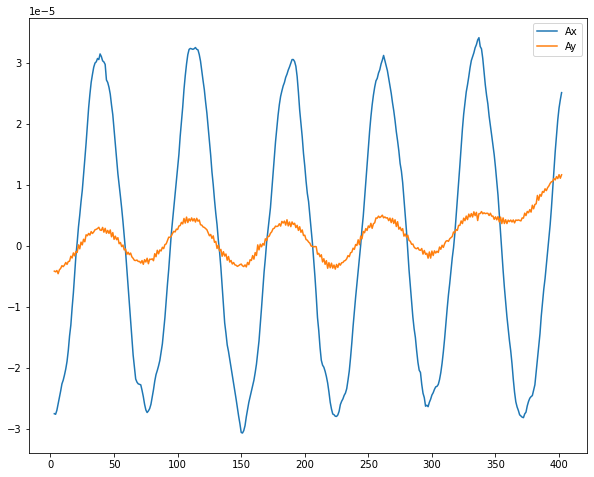

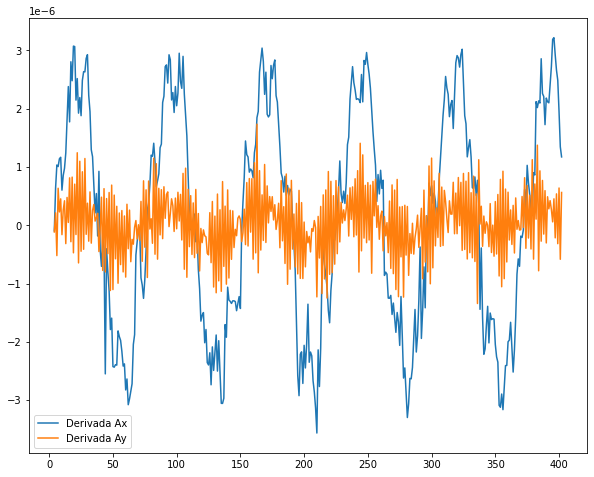

In [19]:
plt.figure(figsize=(10,8))
plt.plot(df["f_ax"].iloc[:1500], label="Força Ax")
plt.plot(df["f_bx"].iloc[:1500], label="Força Bx")
plt.plot(df["e_ax"].iloc[:1500], label="Excitação Ax")
plt.plot(df["e_bx"].iloc[:1500], label="Excitação Bx")
plt.legend()
plt.show()

plt.figure(figsize=(10,8))
plt.plot(df["ax"].iloc[:400], label="Ax")
plt.plot(df["ay"].iloc[:400], label="Ay")
plt.legend()
plt.show()

plt.figure(figsize=(10,8))
plt.plot((df["ax"] - df["ax"].shift()).iloc[:400], label="Derivada Ax")
plt.plot((df["ay"] - df["ay"].shift()).iloc[:400], label="Derivada Ay")
plt.legend()
plt.show()

[]

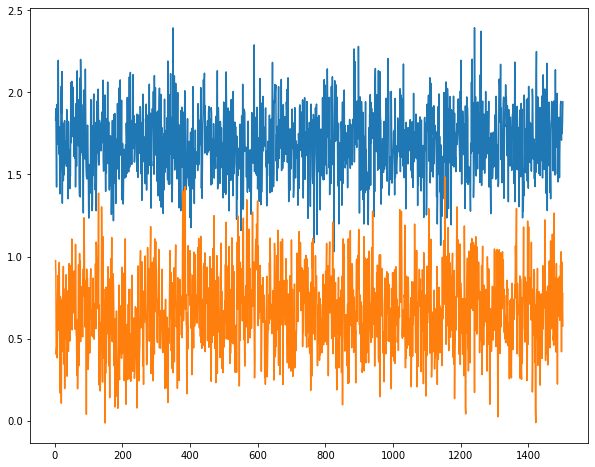

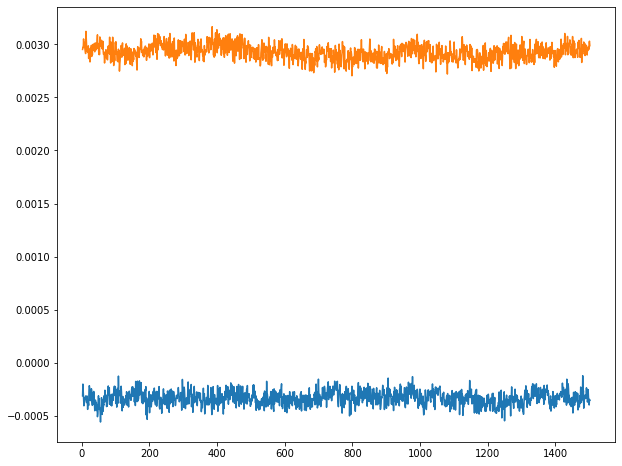

In [21]:
plt.figure(figsize=(10,8))
plt.plot(df["f_ay"].iloc[:1500])
plt.plot(df["f_by"].iloc[:1500])
plt.plot()

plt.figure(figsize=(10,8))
plt.plot(df["e_ay"].iloc[:1500])
plt.plot(df["e_by"].iloc[:1500])
plt.plot()



In [22]:
df["f_ay"].mean() + df["f_ax"].mean() + df["f_by"].mean() + df["f_bx"].mean()

4.677599403781352

In [23]:
df["f_ay"] -= df["f_ay"].mean()
df["f_ax"] -= df["f_ax"].mean()
df["f_bx"] -= df["f_bx"].mean()
df["f_by"] -= df["f_by"].mean()

In [24]:
df["x"] = (df["ax"] + df["bx"])/2
#df["x"] = df["ax"]
df["y"] = (df["ay"] + df["by"])/2
#df["y"] = df["ay"]
df['fx'] = df["f_ax"] + df["f_bx"]
#df["fx"] = df["f_ax"]
df['fy'] = df["f_ay"] + df["f_by"]
#df["fx"] = df["f_ay"]
df = df[["datetime", "x", "y", "fx", "fy"]]

In [25]:
mean_dt = (df["datetime"] - df["datetime"].shift()).median().delta*1e-9

In [26]:
(df["datetime"] - df["datetime"].shift()).median().delta*1e-9

0.00019500000000000002

In [27]:
(df["datetime"] - df["datetime"].shift()).mean().delta*1e-9

0.000195312

In [28]:
for col in ["x", "y"]:
    df = append_derivatives_to_dataframe(df, col, dt=mean_dt)
    
df = append_derivatives_to_dataframe(df, "fx", dt=mean_dt)
df = append_derivatives_to_dataframe(df, "fy", dt=mean_dt)

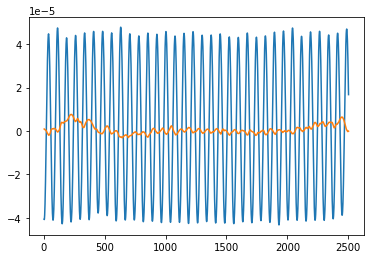

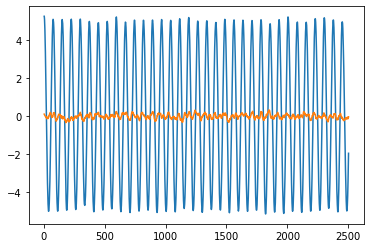

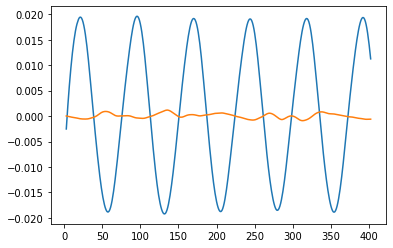

In [30]:
plt.plot(df["x"].iloc[:2500])
plt.plot(df["y"].iloc[:2500])
plt.show()

plt.plot(df["fx"].iloc[:2500])
plt.plot(df["fy"].iloc[:2500])
plt.show()


plt.plot(df["x_dot"].iloc[:400])
plt.plot(df["y_dot"].iloc[:400])
plt.show()


In [30]:
df["x"].shift()

3             NaN
4       -0.000017
5       -0.000019
6       -0.000022
7       -0.000024
           ...   
76811   -0.000004
76812   -0.000006
76813   -0.000009
76814   -0.000011
76815   -0.000013
Name: x, Length: 76800, dtype: float64

In [31]:
(df["x"] - 2*df["x"].shift() + 1*df["x"].shift(2))

3                 NaN
4                 NaN
5        7.659051e-09
6        8.456101e-09
7        9.253152e-09
             ...     
76811    4.948671e-08
76812    5.535553e-08
76813    6.122435e-08
76814    6.709318e-08
76815    7.296200e-08
Name: x, Length: 76800, dtype: float64

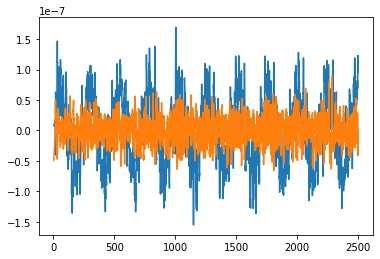

In [32]:
plt.plot((df["x"] - 2*df["x"].shift() + 1*df["x"].shift(2)).iloc[:2500])
plt.plot((df["y"] - 2*df["y"].shift() + 1*df["y"].shift(2)).iloc[:2500])
plt.show()


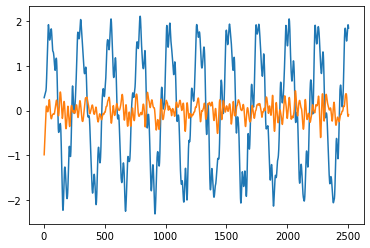

In [33]:
plt.plot(df["x_dot2"].iloc[:2500])
plt.plot(df["y_dot2"].iloc[:2500])

In [34]:
df

datetime         x         y        fx        fy  \
3     2019-03-24 00:16:48.185757 -0.000017  0.000004  0.247761  0.235970   
4     2019-03-24 00:16:48.185952 -0.000019  0.000004  0.249567  0.242628   
5     2019-03-24 00:16:48.186147 -0.000022  0.000004  0.252228  0.244367   
6     2019-03-24 00:16:48.186343 -0.000024  0.000005  0.255806  0.241618   
7     2019-03-24 00:16:48.186538 -0.000026  0.000005  0.260366  0.234816   
...                          ...       ...       ...       ...       ...   
76811 2019-03-24 00:17:03.184780 -0.000006  0.000004 -0.101808  0.148684   
76812 2019-03-24 00:17:03.184976 -0.000009  0.000004 -0.023827  0.174433   
76813 2019-03-24 00:17:03.185171 -0.000011  0.000004  0.068030  0.202375   
76814 2019-03-24 00:17:03.185366 -0.000013  0.000004  0.174911  0.232686   
76815 2019-03-24 00:17:03.185561 -0.000015  0.000004  0.297966  0.265542   

          x_dot    x_dot2     y_dot    y_dot2      fx_dot        fx_dot2  \
3     -0.012128  0.290141  0.000812 -0.986518  -21.448227   56051.561171   
4     -0.012070  0.300724  0.000626 -0.921554  -10.652035   54678.610421   
5     -0.012010  0.311307  0.000453 -0.856590   -0.123569   53305.659670   
6     -0.011949  0.321891  0.000292 -0.791626   10.137172   51932.708919   
7     -0.011885  0.332474  0.000144 -0.726662   20.130188   50559.758169   
...         ...       ...       ...       ...         ...            ...   
76811 -0.011712  0.927788 -0.000297  1.130318  330.636816  236468.009610   
76812 -0.011522  1.020511 -0.000066  1.234641  378.683857  256322.162252   
76813 -0.011314  1.113234  0.000185  1.338964  430.602459  276176.314894   
76814 -0.011088  1.205958  0.000456  1.443287  486.392620  296030.467536   
76815 -0.010844  1.298681  0.000748  1.547610  546.054341  315884.620178   

           fy_dot        fy_dot2  
3       22.905204 -111060.330252  
4        2.120776 -102113.288314  
5      -16.918978  -93166.246377  
6      -34.214060  -84219.204440  
7      -49.764468  -75272.162503  
...           ...            ...  
76811  117.083206    2403.773000  
76812  117.339551     225.402360  
76813  117.171113   -1952.968280  
76814  116.577893   -4131.338920  
76815  115.559891   -6309.709560  

[76800 rows x 13 columns]

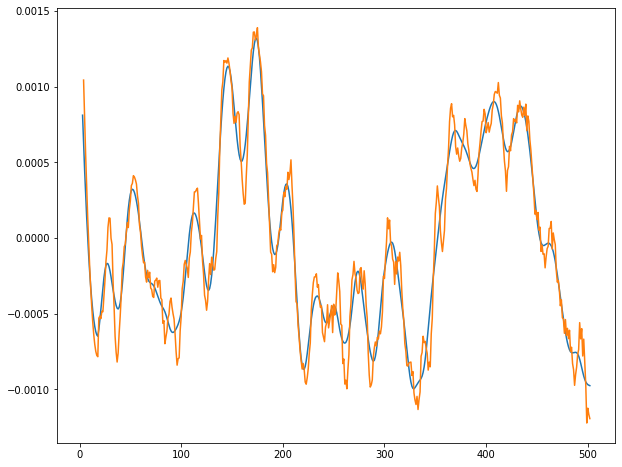

In [35]:
plt.figure(figsize=(10, 8))
plt.plot(df["y_dot"].iloc[:500])
plt.plot((df["y"] - df["y"].shift(1)).iloc[:500]/mean_dt)

In [36]:
df.columns

Index(['datetime', 'x', 'y', 'fx', 'fy', 'x_dot', 'x_dot2', 'y_dot', 'y_dot2',
       'fx_dot', 'fx_dot2', 'fy_dot', 'fy_dot2'],
      dtype='object')

In [37]:
q = np.expand_dims(df[['x', 'y']].values, axis=-1)
q_dot = np.expand_dims(df[['x_dot', 'y_dot']].values, axis=-1)
q_dot2 = np.expand_dims(df[['x_dot2', 'y_dot2']].values, axis=-1)
f = np.expand_dims(df[['fx', 'fy']].values, axis=-1)

#q = np.squeeze(q)
#q_dot = np.squeeze(q_dot)
#q_dot2 = np.squeeze(q_dot2)
#f = np.squeeze(f)

In [38]:
q_dot

array([[[-0.01212773],
        [ 0.00081199]],

       [[-0.01207012],
        [ 0.00062596]],

       [[-0.01201044],
        [ 0.00045259]],

       ...,

       [[-0.01131394],
        [ 0.00018485]],

       [[-0.01108782],
        [ 0.00045612]],

       [[-0.01084362],
        [ 0.00074773]]])

(0.0, 500.0)

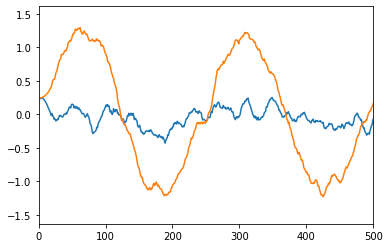

In [39]:
plt.plot(df["fy"])
plt.plot(df["fx"])
plt.xlim((0, 500))

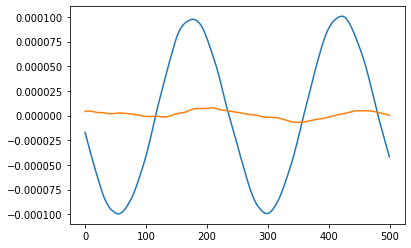

In [40]:
plt.plot(np.squeeze(q)[:500])

(0.0, 500.0)

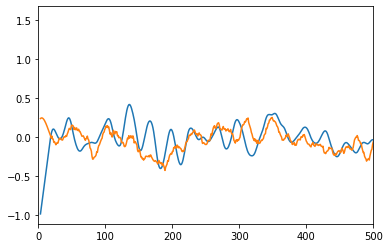

In [41]:
plt.plot(df["y_dot2"])
plt.plot(df["fy"])
plt.xlim((0, 500))

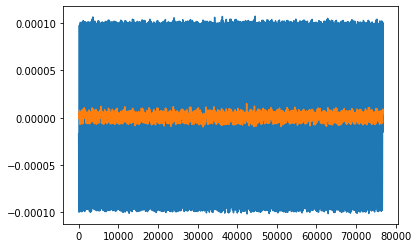

In [42]:
plt.plot(np.squeeze(q))

# Treinamento q_dot2

In [43]:
from jax import random
from jax.experimental.optimizers import adam, sgd
from jax import numpy as jnp
%load_ext autoreload
%autoreload 2
from models.newton import mse, initialize_params, get_batch_forward_pass, get_loss_function, train
from tqdm import tqdm

from utils import Shuffler

rng = random.PRNGKey(20)

/home/felipeangelim/.local/lib/python3.8/site-packages/jax/lib/xla_bridge.py:130: UserWarning: No GPU/TPU found, falling back to CPU.
  warnings.warn('No GPU/TPU found, falling back to CPU.')


In [49]:
params = initialize_params(rng, dims=2, scale=1)
batch_forward_pass = get_batch_forward_pass(mass=[[1, 0],[0, 1]], g=jnp.array([[0],[0]]))

In [50]:

shuffler = Shuffler(len(q))
q_shuffled = shuffler.shuffle(q)
q_dot_shuffled = shuffler.shuffle(q_dot)
q_dot2_shuffled = shuffler.shuffle(q_dot2)
f_shuffled = shuffler.shuffle(f)

In [51]:
params

[DeviceArray([[-0.6630825 , -0.5782476 ],
              [ 0.20764129,  0.9427113 ]], dtype=float32),
 DeviceArray([[-1.4662489 , -0.8464475 ],
              [ 0.6290237 ,  0.26404384]], dtype=float32)]

  0%|          | 1/2400 [00:00<06:16,  6.37it/s]

Epoch 0


100%|██████████| 2400/2400 [00:13<00:00, 172.33it/s]


Epoch 0 , mean error: 0.06646305 params: [DeviceArray([[5663.8516, 2877.7087],
             [-834.061 , 3942.9314]], dtype=float32), DeviceArray([[ 22.440323 ,   2.290606 ],
             [ -2.5705216, -20.665216 ]], dtype=float32)]


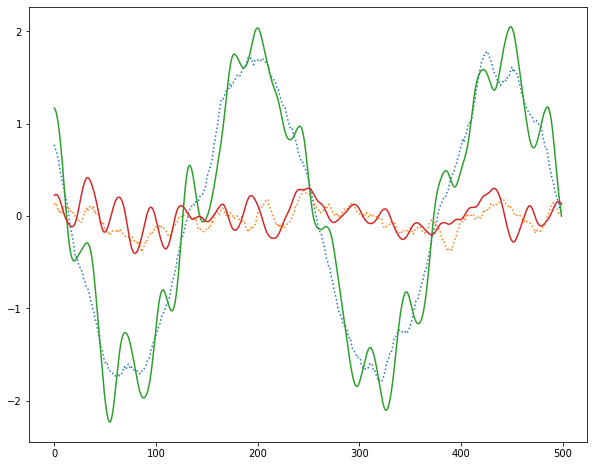

  0%|          | 0/2400 [00:00<?, ?it/s]

Epoch 1


100%|██████████| 2400/2400 [00:14<00:00, 163.97it/s]


Epoch 1 , mean error: 0.060126852 params: [DeviceArray([[5870.3003 , 2111.9338 ],
             [-881.55853, 6085.4546 ]], dtype=float32), DeviceArray([[ 22.361444 , -11.986389 ],
             [ -1.9742733, -20.510357 ]], dtype=float32)]


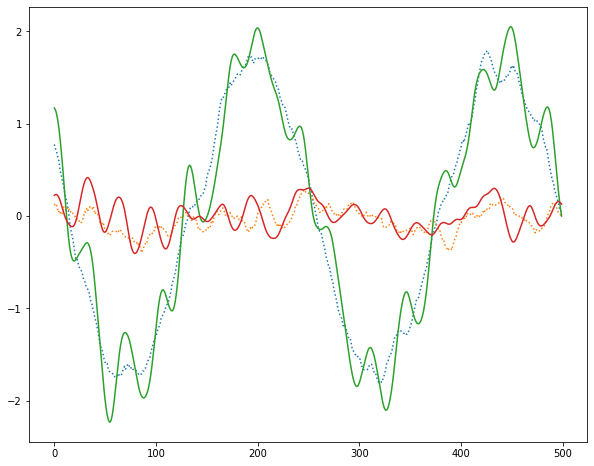

  0%|          | 0/2400 [00:00<?, ?it/s]

Epoch 2


100%|██████████| 2400/2400 [00:14<00:00, 168.67it/s]


Epoch 2 , mean error: 0.060025744 params: [DeviceArray([[5887.7666, 1415.1234],
             [-917.5693, 7693.079 ]], dtype=float32), DeviceArray([[ 22.116848 , -12.151192 ],
             [ -1.4065402, -20.46843  ]], dtype=float32)]


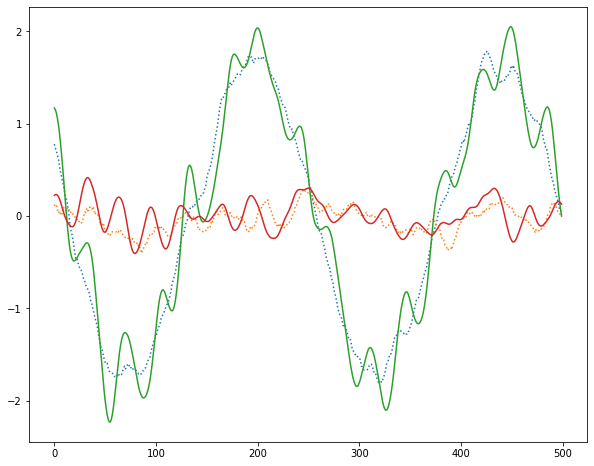

  0%|          | 0/2400 [00:00<?, ?it/s]

Epoch 3


100%|██████████| 2400/2400 [00:13<00:00, 175.47it/s]


Epoch 3 , mean error: 0.059970595 params: [DeviceArray([[5900.956 ,  831.948 ],
             [-944.6048, 8897.508 ]], dtype=float32), DeviceArray([[ 21.916735 , -12.192981 ],
             [ -0.9773442, -20.444109 ]], dtype=float32)]


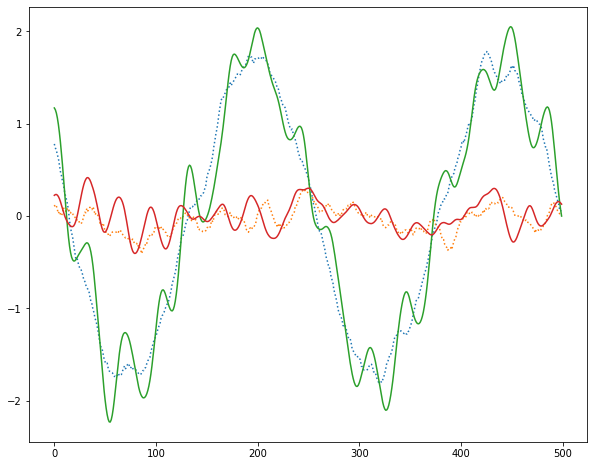

In [53]:


def callback(y_pred, y_true):
    
    plt.figure(figsize=(10, 8))
    plt.plot(shuffler.undo_shuffle(np.squeeze(y_pred))[100:600], linestyle="dotted")
    plt.plot(shuffler.undo_shuffle(np.squeeze(y_true))[100:600])
    plt.show()


train(params, q_shuffled, q_dot_shuffled, q_dot2_shuffled, f_shuffled, batch_size=32, optimizer=adam, step_size=1e1, epochs=4, callback=callback, batch_forward_pass=batch_forward_pass)

# Treinamento f

In [185]:
from jax import random
from jax.experimental.optimizers import adam, sgd
from jax import numpy as jnp
%load_ext autoreload
%autoreload 2
from models.newton_f import mse, initialize_params, get_batch_forward_pass, get_loss_function, train
from tqdm import tqdm

from utils import Shuffler

rng = random.PRNGKey(20)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [186]:
params = initialize_params(rng, dims=2)
batch_forward_pass = get_batch_forward_pass(mass=[[1, 0],[0, 1]], g=jnp.array([[0],[9.81]]))

In [187]:

shuffler = Shuffler(len(q))
q_shuffled = shuffler.shuffle(q)
q_dot_shuffled = shuffler.shuffle(q_dot)
q_dot2_shuffled = shuffler.shuffle(q_dot2)
f_shuffled = shuffler.shuffle(f)

In [188]:
params

[DeviceArray([[-0.6630825 , -0.5782476 ],
              [ 0.20764129,  0.9427113 ]], dtype=float32),
 DeviceArray([[-1.4662489 , -0.8464475 ],
              [ 0.6290237 ,  0.26404384]], dtype=float32),
 DeviceArray([[ 0.20237727,  0.46542647],
              [-1.4772527 , -0.7545277 ]], dtype=float32)]

  0%|          | 1/440 [00:00<01:22,  5.32it/s]

Epoch 0


100%|██████████| 440/440 [00:03<00:00, 115.55it/s]


Epoch 0 , mean error: 141.71582 params: [DeviceArray([[  21.938673, -196.67058 ],
             [  72.11716 , -812.3928  ]], dtype=float32), DeviceArray([[191.90094 , -14.08522 ],
             [805.66797 ,  11.300436]], dtype=float32), DeviceArray([[ 0.34400755, -0.22385912],
             [-0.6802003 , -0.23719639]], dtype=float32)]


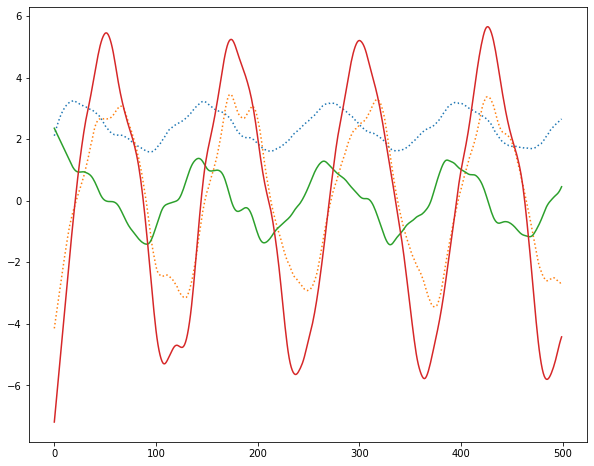

  0%|          | 0/440 [00:00<?, ?it/s]

Epoch 1


100%|██████████| 440/440 [00:03<00:00, 114.73it/s]


Epoch 1 , mean error: 0.19046009 params: [DeviceArray([[    9.611093,  -244.73384 ],
             [   96.066   , -1036.6348  ]], dtype=float32), DeviceArray([[ 232.7926  ,  -25.834856],
             [1004.3187  ,   27.64972 ]], dtype=float32), DeviceArray([[ 0.14078574, -0.22595935],
             [-0.34535328, -0.24417329]], dtype=float32)]


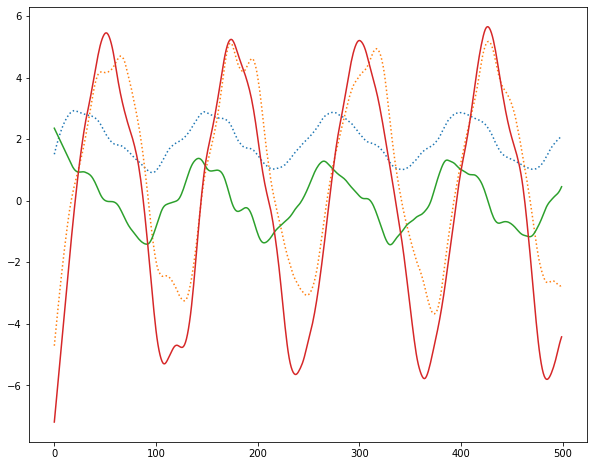

  0%|          | 0/440 [00:00<?, ?it/s]

Epoch 2


100%|██████████| 440/440 [00:03<00:00, 113.17it/s]


Epoch 2 , mean error: 0.10977977 params: [DeviceArray([[ 4.32022624e-02, -2.59956696e+02],
             [ 1.04275314e+02, -1.10628906e+03]], dtype=float32), DeviceArray([[ 238.18979 ,  -29.175625],
             [1037.5736  ,   36.4464  ]], dtype=float32), DeviceArray([[ 0.04450618, -0.22908841],
             [-0.1759889 , -0.24317671]], dtype=float32)]


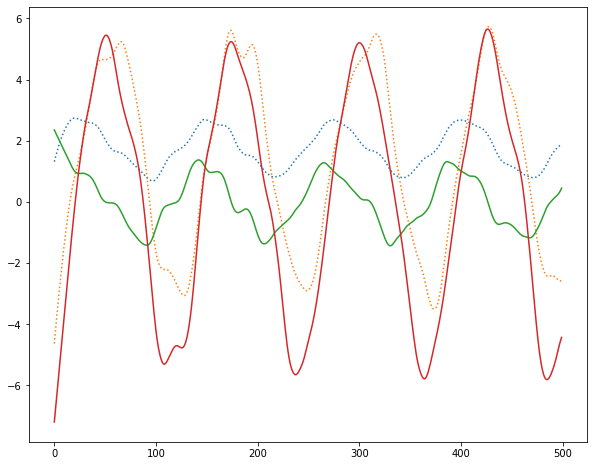

  0%|          | 0/440 [00:00<?, ?it/s]

Epoch 3


100%|██████████| 440/440 [00:03<00:00, 111.49it/s]


Epoch 3 , mean error: 0.10851493 params: [DeviceArray([[   -9.568536,  -272.44818 ],
             [  106.26252 , -1154.9607  ]], dtype=float32), DeviceArray([[ 238.31047 ,  -29.865358],
             [1040.1226  ,   39.890934]], dtype=float32), DeviceArray([[ 0.04022453, -0.23144966],
             [-0.08463514, -0.24474248]], dtype=float32)]


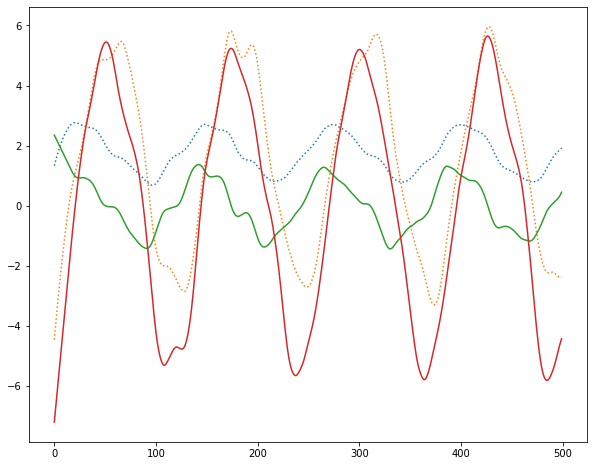

  0%|          | 0/440 [00:00<?, ?it/s]

Epoch 4


100%|██████████| 440/440 [00:03<00:00, 119.78it/s]


Epoch 4 , mean error: 0.109451555 params: [DeviceArray([[  -20.861814,  -287.5616  ],
             [  105.90072 , -1211.4966  ]], dtype=float32), DeviceArray([[ 237.98138 ,  -29.874338],
             [1039.176   ,   40.79148 ]], dtype=float32), DeviceArray([[-0.00038454, -0.23431379],
             [-0.13143179, -0.24981341]], dtype=float32)]


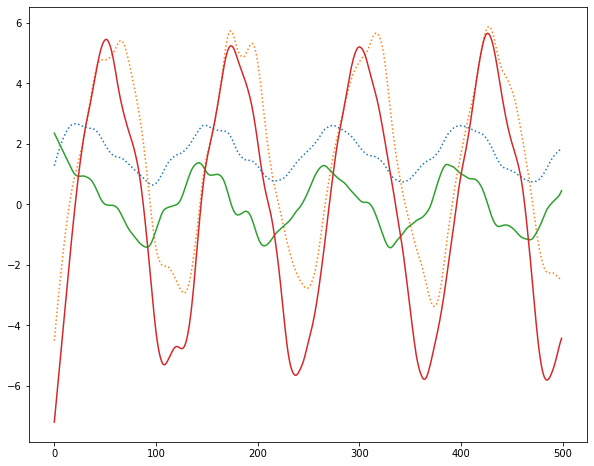

  0%|          | 0/440 [00:00<?, ?it/s]

Epoch 5


100%|██████████| 440/440 [00:03<00:00, 120.21it/s]


Epoch 5 , mean error: 0.11226146 params: [DeviceArray([[  -34.707146,  -306.53055 ],
             [  104.68297 , -1281.646   ]], dtype=float32), DeviceArray([[ 237.73448 ,  -29.699028],
             [1037.7296  ,   41.21189 ]], dtype=float32), DeviceArray([[ 0.01148006, -0.23048313],
             [-0.18488166, -0.24358505]], dtype=float32)]


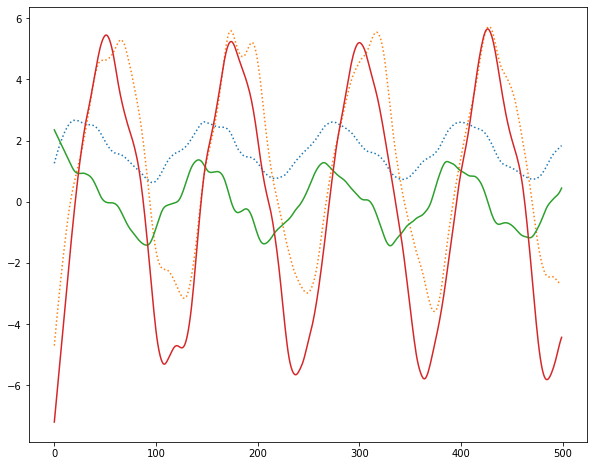

  0%|          | 0/440 [00:00<?, ?it/s]

Epoch 6


100%|██████████| 440/440 [00:03<00:00, 114.50it/s]


Epoch 6 , mean error: 0.121992074 params: [DeviceArray([[  -52.017174,  -329.62952 ],
             [  102.8896  , -1368.7994  ]], dtype=float32), DeviceArray([[ 237.0899,  -29.6821],
             [1036.0228,   41.4981]], dtype=float32), DeviceArray([[ 0.03718172, -0.22521387],
             [-0.24873225, -0.23936588]], dtype=float32)]


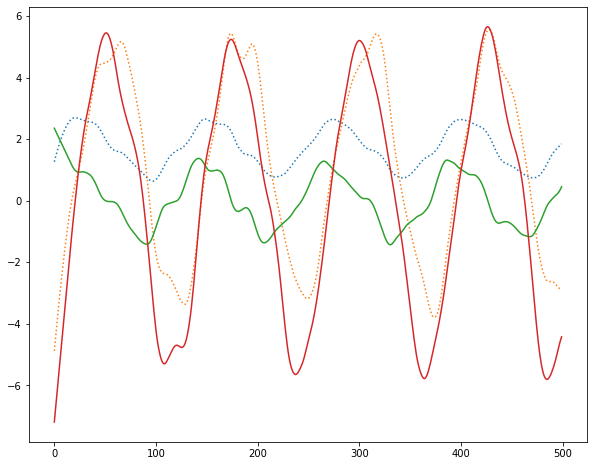

  0%|          | 0/440 [00:00<?, ?it/s]

Epoch 7


100%|██████████| 440/440 [00:03<00:00, 113.34it/s]


Epoch 7 , mean error: 0.14212258 params: [DeviceArray([[  -73.9318 ,  -358.68692],
             [   99.85604, -1476.1921 ]], dtype=float32), DeviceArray([[ 236.63977 ,  -29.898159],
             [1033.5192  ,   41.663136]], dtype=float32), DeviceArray([[ 0.10281117, -0.23507546],
             [-0.10975293, -0.2702606 ]], dtype=float32)]


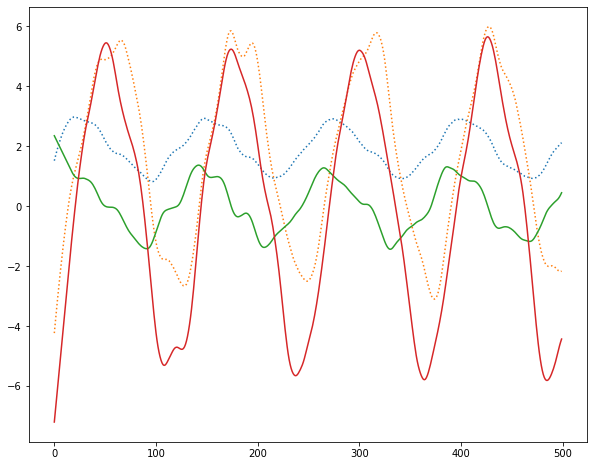

  0%|          | 0/440 [00:00<?, ?it/s]

Epoch 8


100%|██████████| 440/440 [00:03<00:00, 117.69it/s]


Epoch 8 , mean error: 0.15481387 params: [DeviceArray([[ -100.26845,  -393.81528],
             [   97.53169, -1608.378  ]], dtype=float32), DeviceArray([[ 235.05069 ,  -29.715168],
             [1030.6154  ,   42.66658 ]], dtype=float32), DeviceArray([[ 0.05956423, -0.2307195 ],
             [-0.15985304, -0.3157825 ]], dtype=float32)]


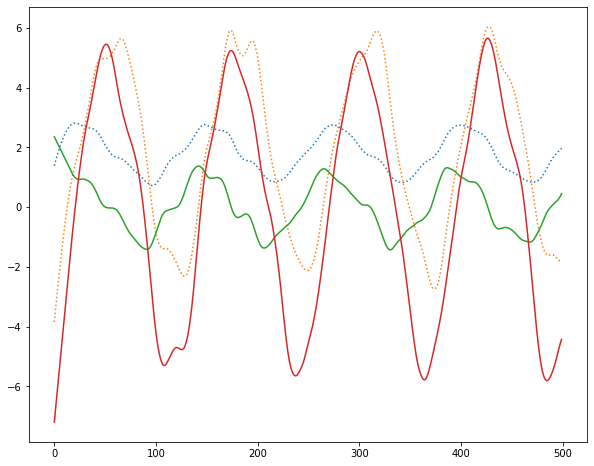

  0%|          | 0/440 [00:00<?, ?it/s]

Epoch 9


100%|██████████| 440/440 [00:03<00:00, 115.91it/s]


Epoch 9 , mean error: 0.63432616 params: [DeviceArray([[ -129.84203,  -436.3372 ],
             [   95.51372, -1768.817  ]], dtype=float32), DeviceArray([[ 233.25407 ,  -29.4724  ],
             [1027.2651  ,   42.432037]], dtype=float32), DeviceArray([[-0.03602806, -0.2578005 ],
             [-0.22950542, -0.34721187]], dtype=float32)]


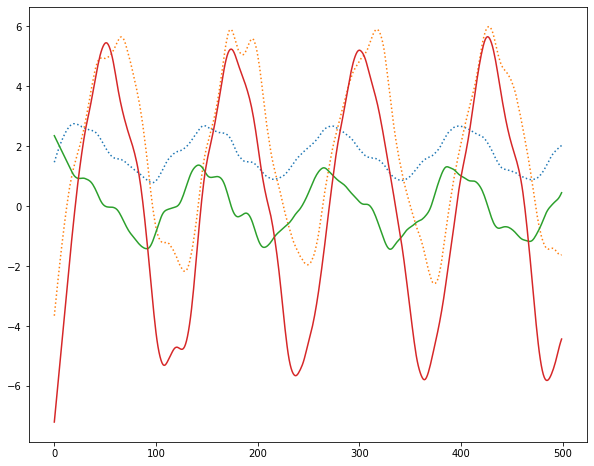

  0%|          | 0/440 [00:00<?, ?it/s]

Epoch 10


100%|██████████| 440/440 [00:03<00:00, 117.95it/s]


Epoch 10 , mean error: 1.4077349 params: [DeviceArray([[ -146.39102,  -484.16458],
             [   90.6106 , -1941.3009 ]], dtype=float32), DeviceArray([[ 236.1016  ,  -24.418394],
             [1023.7588  ,   39.292118]], dtype=float32), DeviceArray([[ 0.06402467, -0.26690033],
             [ 0.12312573, -0.23620528]], dtype=float32)]


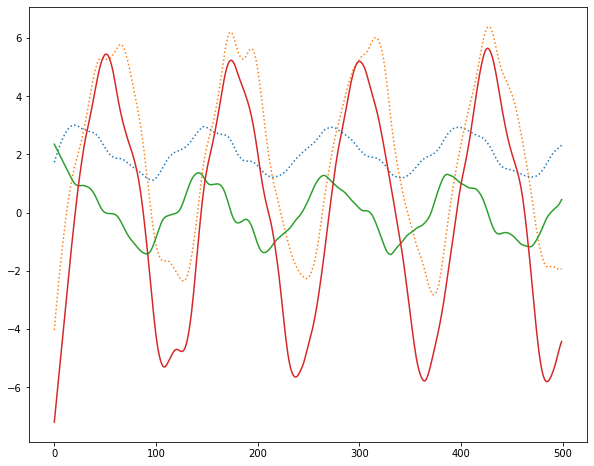

  0%|          | 0/440 [00:00<?, ?it/s]

Epoch 11


100%|██████████| 440/440 [00:04<00:00, 109.34it/s]


Epoch 11 , mean error: 0.77094096 params: [DeviceArray([[ -168.47504 ,  -519.8318  ],
             [   88.712776, -2117.2131  ]], dtype=float32), DeviceArray([[ 228.8721  ,  -29.564894],
             [1021.7114  ,   41.590176]], dtype=float32), DeviceArray([[ 0.6986305 ,  0.00222498],
             [-0.04309013, -0.30540365]], dtype=float32)]


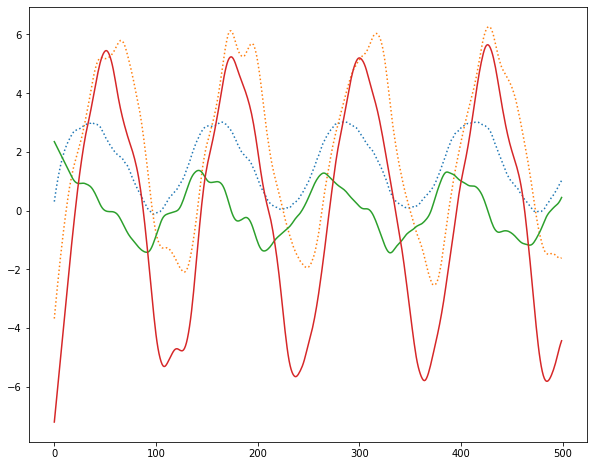

  0%|          | 0/440 [00:00<?, ?it/s]

Epoch 12


100%|██████████| 440/440 [00:03<00:00, 113.26it/s]


Epoch 12 , mean error: 1.1108994 params: [DeviceArray([[ -183.46338,  -570.1523 ],
             [   84.96315, -2295.3335 ]], dtype=float32), DeviceArray([[ 235.39914 ,  -30.680805],
             [1014.9935  ,   40.511234]], dtype=float32), DeviceArray([[-0.07528442, -0.27533793],
             [-0.18519887, -0.39094657]], dtype=float32)]


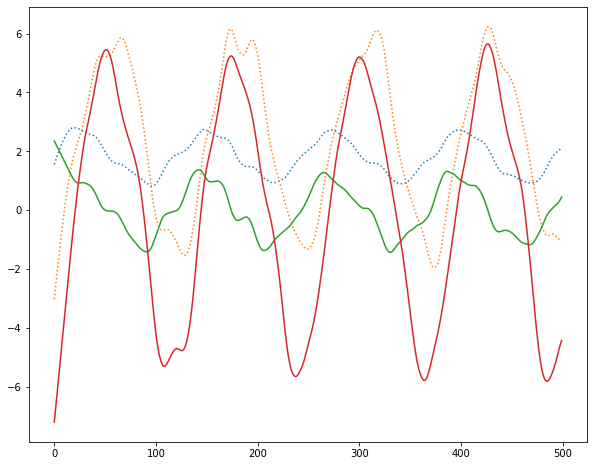

  0%|          | 0/440 [00:00<?, ?it/s]

Epoch 13


100%|██████████| 440/440 [00:03<00:00, 119.41it/s]


Epoch 13 , mean error: 1.0628264 params: [DeviceArray([[ -199.38269,  -609.7342 ],
             [   81.14144, -2480.7058 ]], dtype=float32), DeviceArray([[ 226.67142 ,  -28.819447],
             [1015.5387  ,   41.130756]], dtype=float32), DeviceArray([[ 0.7223545 , -0.02624509],
             [-0.01371263, -0.26101142]], dtype=float32)]


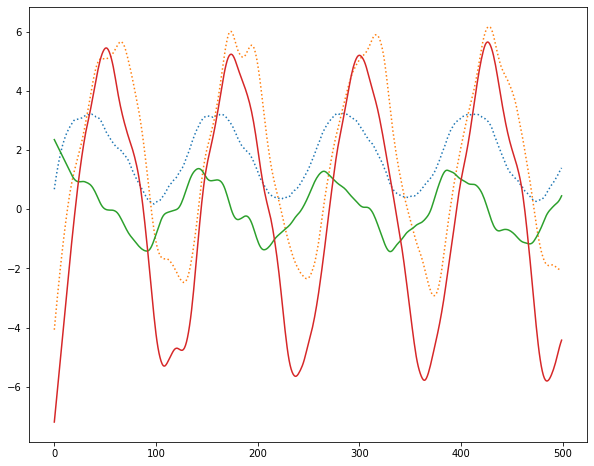

  0%|          | 0/440 [00:00<?, ?it/s]

Epoch 14


100%|██████████| 440/440 [00:03<00:00, 121.00it/s]


Epoch 14 , mean error: 1.1309232 params: [DeviceArray([[ -214.7604 ,  -653.8935 ],
             [   76.36155, -2657.2087 ]], dtype=float32), DeviceArray([[ 224.11467 ,  -28.944809],
             [1006.799   ,   40.444683]], dtype=float32), DeviceArray([[ 0.9288863 ,  0.23497939],
             [ 0.14084575, -0.19137514]], dtype=float32)]


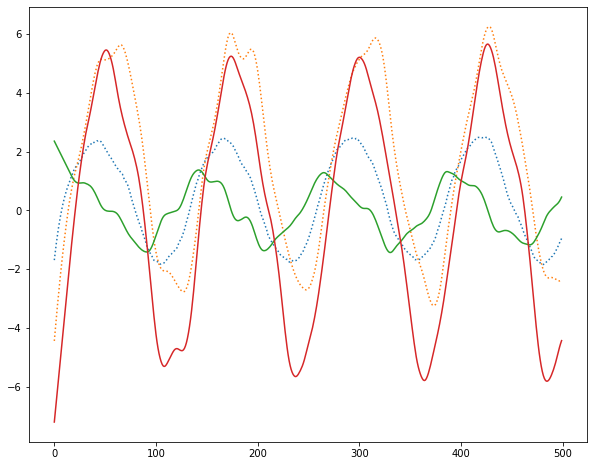

  0%|          | 0/440 [00:00<?, ?it/s]

Epoch 15


100%|██████████| 440/440 [00:03<00:00, 114.59it/s]


Epoch 15 , mean error: 1.093324 params: [DeviceArray([[ -233.80782,  -701.7418 ],
             [   72.30864, -2835.017  ]], dtype=float32), DeviceArray([[ 227.73972 ,  -29.141748],
             [1009.93207 ,   41.09597 ]], dtype=float32), DeviceArray([[ 0.27857983, -0.20122549],
             [-0.01406832, -0.2574034 ]], dtype=float32)]


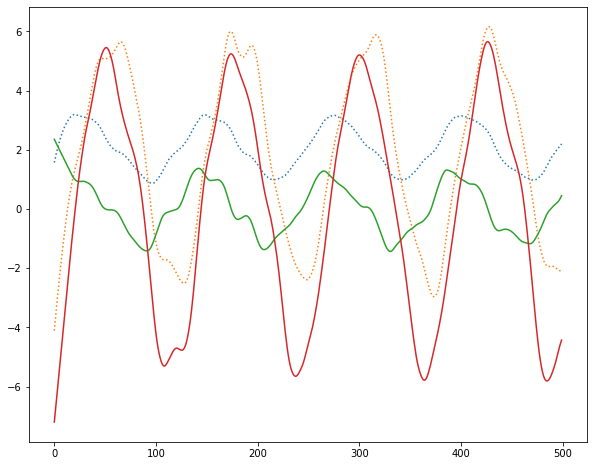

  0%|          | 0/440 [00:00<?, ?it/s]

Epoch 16


100%|██████████| 440/440 [00:03<00:00, 111.33it/s]


Epoch 16 , mean error: 0.96123505 params: [DeviceArray([[ -253.05267,  -751.8837 ],
             [   67.74825, -3013.043  ]], dtype=float32), DeviceArray([[ 232.57664 ,  -30.738886],
             [1000.9046  ,   40.422173]], dtype=float32), DeviceArray([[-0.656378  , -0.31895185],
             [ 0.10070601, -0.23313637]], dtype=float32)]


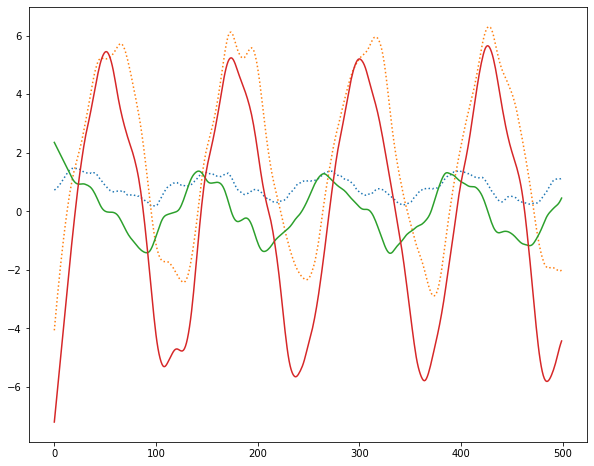

  0%|          | 0/440 [00:00<?, ?it/s]

Epoch 17


100%|██████████| 440/440 [00:03<00:00, 113.03it/s]


Epoch 17 , mean error: 1.2296014 params: [DeviceArray([[ -270.6951 ,  -791.455  ],
             [   62.02059, -3195.0322 ]], dtype=float32), DeviceArray([[226.61234 , -30.052969],
             [997.1894  ,  40.511143]], dtype=float32), DeviceArray([[ 0.47607353, -0.10374212],
             [ 0.12622204, -0.1927109 ]], dtype=float32)]


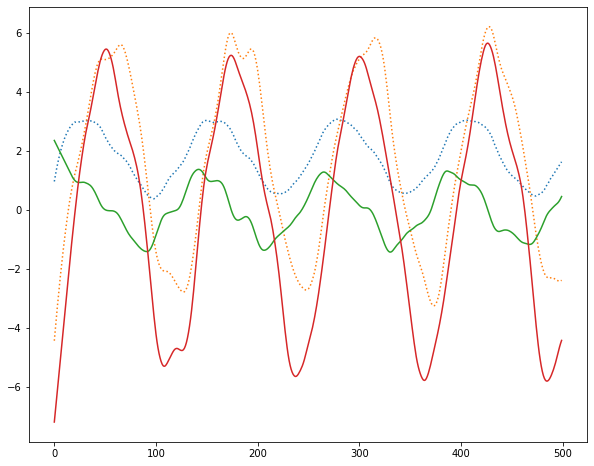

  0%|          | 0/440 [00:00<?, ?it/s]

Epoch 18


100%|██████████| 440/440 [00:03<00:00, 116.85it/s]


Epoch 18 , mean error: 1.0499067 params: [DeviceArray([[ -286.07318,  -842.4488 ],
             [   59.99842, -3372.878  ]], dtype=float32), DeviceArray([[232.3565  , -29.437431],
             [998.83765 ,  41.587543]], dtype=float32), DeviceArray([[-0.4419076 , -0.40818006],
             [-0.05348212, -0.31910938]], dtype=float32)]


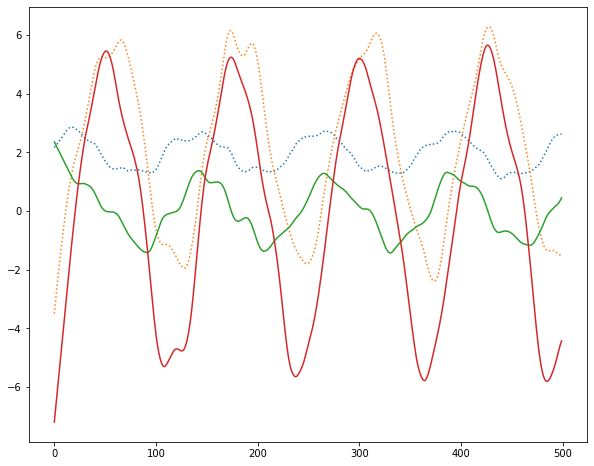

  0%|          | 0/440 [00:00<?, ?it/s]

Epoch 19


100%|██████████| 440/440 [00:03<00:00, 116.19it/s]


Epoch 19 , mean error: 0.9588109 params: [DeviceArray([[ -306.52762 ,  -881.4028  ],
             [   55.937107, -3558.4502  ]], dtype=float32), DeviceArray([[223.83852 , -28.943079],
             [996.5738  ,  39.69806 ]], dtype=float32), DeviceArray([[ 0.55712247, -0.3019274 ],
             [-0.1467728 , -0.35777193]], dtype=float32)]


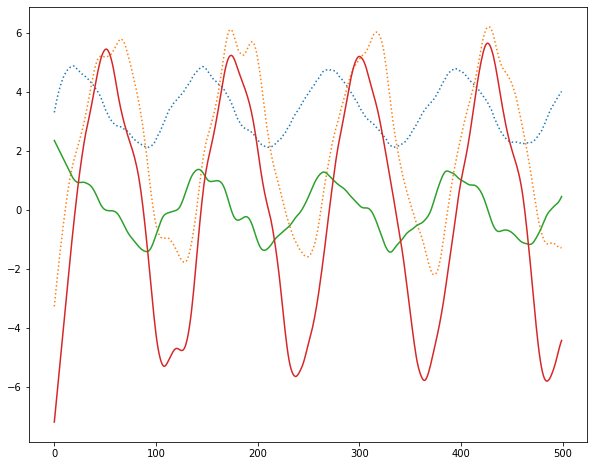

  0%|          | 0/440 [00:00<?, ?it/s]

Epoch 20


100%|██████████| 440/440 [00:03<00:00, 114.11it/s]


Epoch 20 , mean error: 1.1612316 params: [DeviceArray([[ -321.62955,  -926.05963],
             [   51.54638, -3734.0278 ]], dtype=float32), DeviceArray([[225.87428 , -29.527168],
             [987.78455 ,  40.435234]], dtype=float32), DeviceArray([[ 0.09009768, -0.22552806],
             [ 0.09670669, -0.21219608]], dtype=float32)]


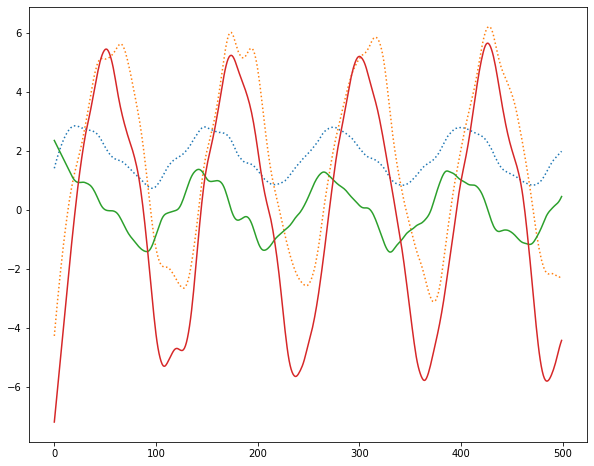

  0%|          | 0/440 [00:00<?, ?it/s]

Epoch 21


100%|██████████| 440/440 [00:03<00:00, 118.61it/s]


Epoch 21 , mean error: 0.90106595 params: [DeviceArray([[ -341.05957 ,  -974.1272  ],
             [   47.334015, -3919.7253  ]], dtype=float32), DeviceArray([[228.04008 , -30.089544],
             [990.6443  ,  39.30851 ]], dtype=float32), DeviceArray([[-0.12923577, -0.19290614],
             [-0.19157667, -0.32730865]], dtype=float32)]


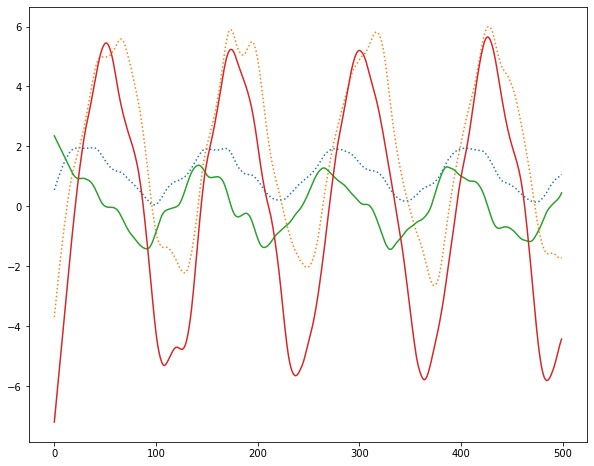

  0%|          | 0/440 [00:00<?, ?it/s]

Epoch 22


100%|██████████| 440/440 [00:03<00:00, 116.99it/s]


Epoch 22 , mean error: 1.1564981 params: [DeviceArray([[ -362.2849 , -1019.6096 ],
             [   44.62693, -4093.6143 ]], dtype=float32), DeviceArray([[227.17078 , -29.933542],
             [982.25006 ,  40.75716 ]], dtype=float32), DeviceArray([[ 0.1981839 , -0.25585413],
             [-0.40373313, -0.49877918]], dtype=float32)]


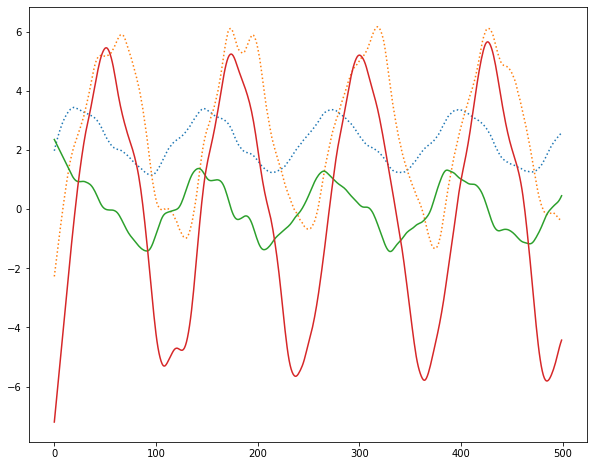

  0%|          | 0/440 [00:00<?, ?it/s]

Epoch 23


100%|██████████| 440/440 [00:03<00:00, 115.27it/s]


Epoch 23 , mean error: 1.1217843 params: [DeviceArray([[ -378.28528, -1062.2317 ],
             [   39.69711, -4276.7305 ]], dtype=float32), DeviceArray([[224.24658, -28.85595],
             [983.88696,  39.5615 ]], dtype=float32), DeviceArray([[ 0.2901417 , -0.13245864],
             [-0.17077154, -0.3391682 ]], dtype=float32)]


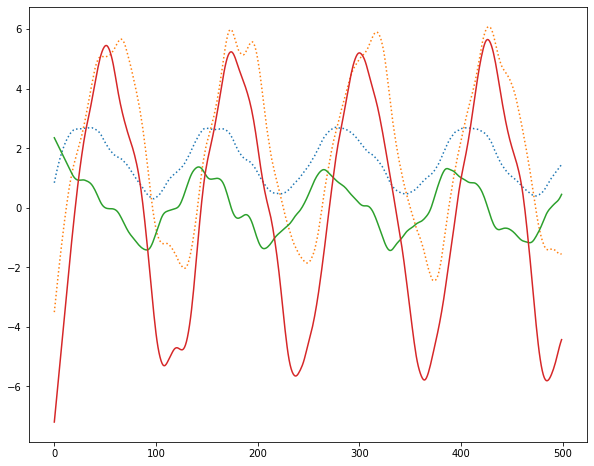

  0%|          | 0/440 [00:00<?, ?it/s]

Epoch 24


100%|██████████| 440/440 [00:03<00:00, 115.65it/s]


Epoch 24 , mean error: 1.0490062 params: [DeviceArray([[ -394.32278, -1100.0149 ],
             [   35.47979, -4448.8325 ]], dtype=float32), DeviceArray([[218.215   , -29.890568],
             [976.5269  ,  40.50171 ]], dtype=float32), DeviceArray([[ 0.15516505, -0.2320727 ],
             [-0.07137673, -0.2944262 ]], dtype=float32)]


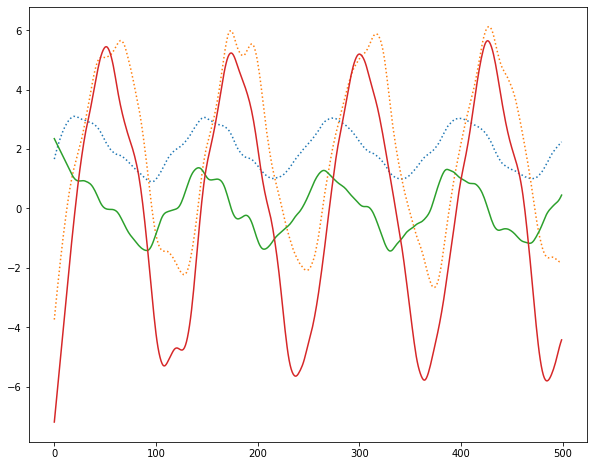

  0%|          | 0/440 [00:00<?, ?it/s]

Epoch 25


100%|██████████| 440/440 [00:03<00:00, 114.72it/s]


Epoch 25 , mean error: 0.9155448 params: [DeviceArray([[ -411.14243 , -1153.6129  ],
             [   30.769613, -4621.3516  ]], dtype=float32), DeviceArray([[226.91148 , -31.045425],
             [971.8312  ,  40.435856]], dtype=float32), DeviceArray([[-0.49959815, -0.21037883],
             [ 0.17735568, -0.19439363]], dtype=float32)]


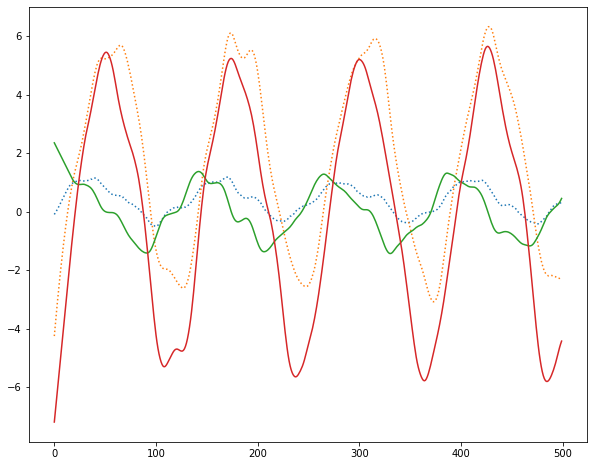

  0%|          | 0/440 [00:00<?, ?it/s]

Epoch 26


100%|██████████| 440/440 [00:03<00:00, 110.54it/s]


Epoch 26 , mean error: 1.2362763 params: [DeviceArray([[ -428.28204 , -1192.658   ],
             [   27.970675, -4792.053   ]], dtype=float32), DeviceArray([[217.20772 , -28.444921],
             [974.34033 ,  41.215523]], dtype=float32), DeviceArray([[ 0.5901298 , -0.15697724],
             [-0.01751457, -0.26423082]], dtype=float32)]


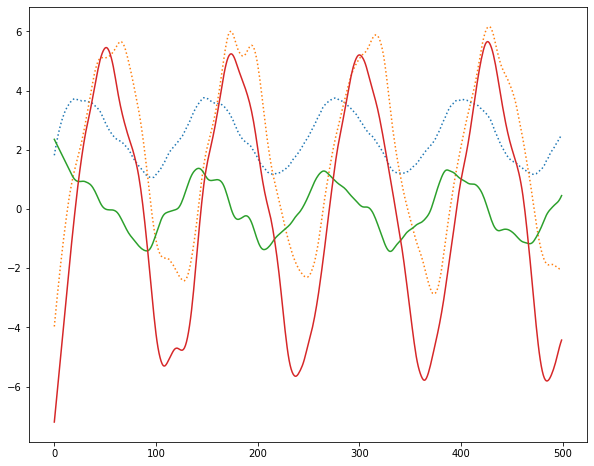

  0%|          | 0/440 [00:00<?, ?it/s]

Epoch 27


100%|██████████| 440/440 [00:04<00:00, 108.67it/s]


Epoch 27 , mean error: 0.8847737 params: [DeviceArray([[ -445.63184 , -1240.4457  ],
             [   24.419024, -4969.58    ]], dtype=float32), DeviceArray([[221.83711 , -30.071035],
             [970.86066 ,  39.88568 ]], dtype=float32), DeviceArray([[-0.09599565, -0.21469574],
             [-0.14025784, -0.37943494]], dtype=float32)]


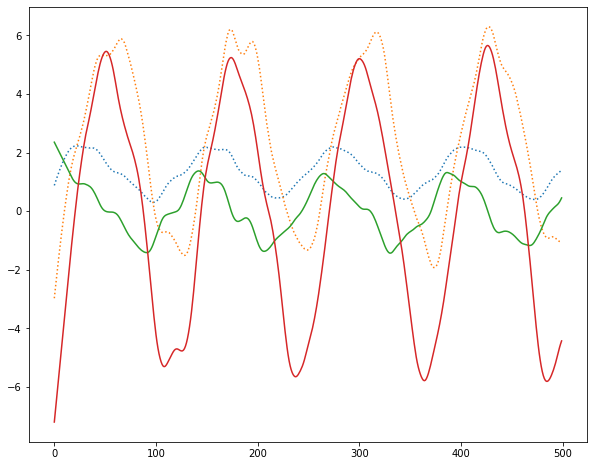

  0%|          | 0/440 [00:00<?, ?it/s]

Epoch 28


100%|██████████| 440/440 [00:03<00:00, 111.02it/s]


Epoch 28 , mean error: 1.1613272 params: [DeviceArray([[ -465.05588 , -1278.2478  ],
             [   20.170614, -5142.8384  ]], dtype=float32), DeviceArray([[216.68967 , -29.461493],
             [963.7308  ,  40.650173]], dtype=float32), DeviceArray([[ 0.42965212, -0.1661171 ],
             [-0.01951092, -0.27702066]], dtype=float32)]


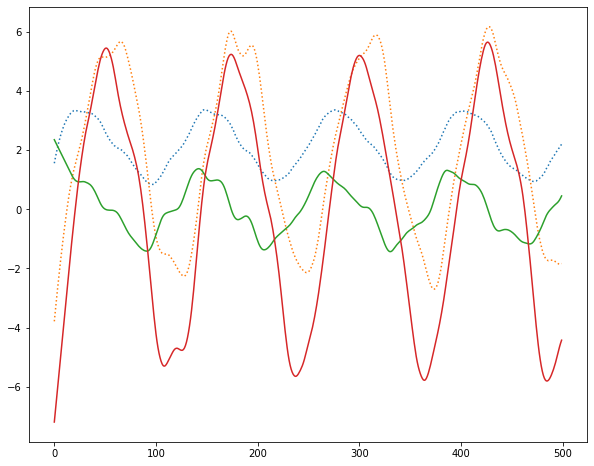

  0%|          | 0/440 [00:00<?, ?it/s]

Epoch 29


100%|██████████| 440/440 [00:03<00:00, 117.54it/s]


Epoch 29 , mean error: 1.341309 params: [DeviceArray([[ -486.7647  , -1326.1957  ],
             [   15.543308, -5317.1646  ]], dtype=float32), DeviceArray([[220.21838 , -29.892694],
             [961.1682  ,  40.30739 ]], dtype=float32), DeviceArray([[ 0.05713016, -0.23346314],
             [ 0.05312772, -0.2833795 ]], dtype=float32)]


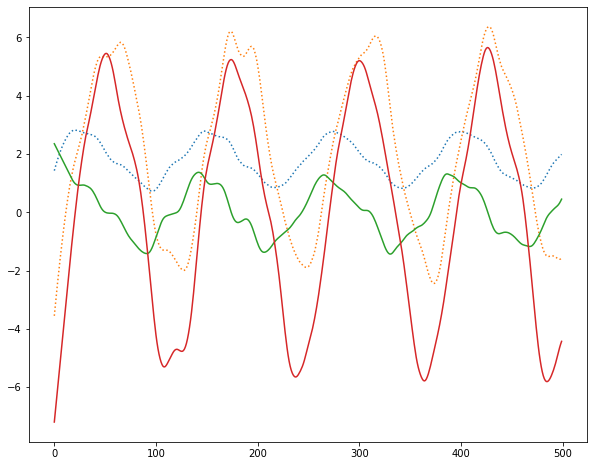

  0%|          | 0/440 [00:00<?, ?it/s]

Epoch 30


100%|██████████| 440/440 [00:03<00:00, 120.40it/s]


Epoch 30 , mean error: 0.85090166 params: [DeviceArray([[ -503.78003 , -1364.4984  ],
             [   12.893527, -5491.6196  ]], dtype=float32), DeviceArray([[215.18547, -29.21558],
             [960.0808 ,  40.99928]], dtype=float32), DeviceArray([[ 0.12591334, -0.29893172],
             [-0.11853771, -0.3430741 ]], dtype=float32)]


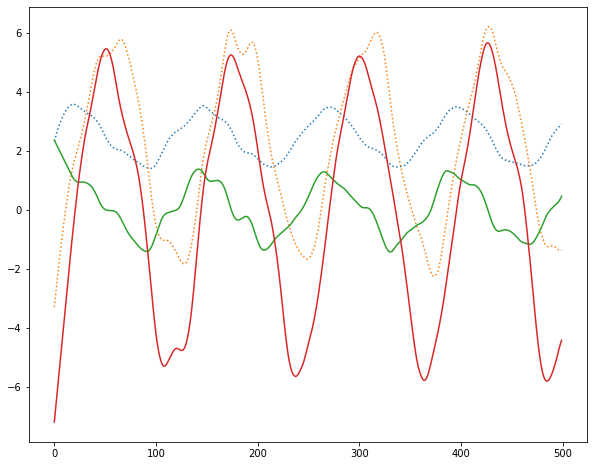

  0%|          | 0/440 [00:00<?, ?it/s]

Epoch 31


100%|██████████| 440/440 [00:03<00:00, 121.51it/s]


Epoch 31 , mean error: 1.0303265 params: [DeviceArray([[ -522.3258  , -1407.1205  ],
             [    9.195934, -5665.231   ]], dtype=float32), DeviceArray([[214.15457 , -29.689266],
             [958.18866 ,  39.449036]], dtype=float32), DeviceArray([[ 0.28806478, -0.19926436],
             [-0.03996494, -0.33765483]], dtype=float32)]


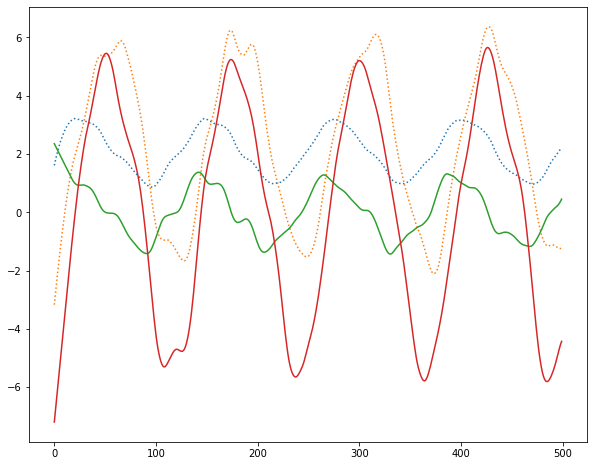

  0%|          | 0/440 [00:00<?, ?it/s]

Epoch 32


100%|██████████| 440/440 [00:03<00:00, 119.76it/s]


Epoch 32 , mean error: 1.0319649 params: [DeviceArray([[ -541.913   , -1455.1798  ],
             [    6.567361, -5834.698   ]], dtype=float32), DeviceArray([[214.51357 , -29.135324],
             [954.4246  ,  39.27953 ]], dtype=float32), DeviceArray([[ 0.35744125, -0.22811018],
             [ 0.00582737, -0.32743078]], dtype=float32)]


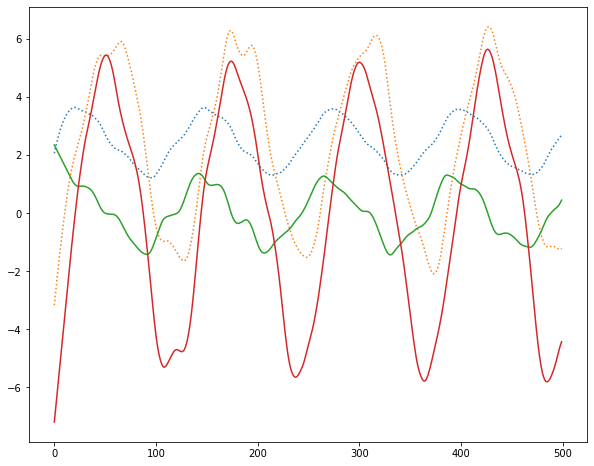

  0%|          | 0/440 [00:00<?, ?it/s]

Epoch 33


100%|██████████| 440/440 [00:03<00:00, 123.97it/s]


Epoch 33 , mean error: 0.9968079 params: [DeviceArray([[-5.6168805e+02, -1.5018558e+03],
             [ 3.8910758e+00, -6.0002646e+03]], dtype=float32), DeviceArray([[213.53795 , -29.912165],
             [948.0354  ,  40.45565 ]], dtype=float32), DeviceArray([[ 0.30465734, -0.17758685],
             [ 0.05323249, -0.2635597 ]], dtype=float32)]


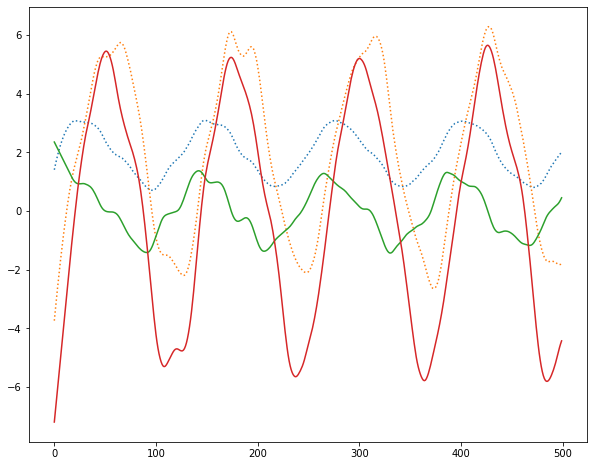

  0%|          | 0/440 [00:00<?, ?it/s]

Epoch 34


100%|██████████| 440/440 [00:03<00:00, 121.59it/s]


Epoch 34 , mean error: 1.0269073 params: [DeviceArray([[-5.7774963e+02, -1.5495992e+03],
             [-4.0993160e-01, -6.1734849e+03]], dtype=float32), DeviceArray([[217.11433 , -28.676054],
             [948.875   ,  39.989155]], dtype=float32), DeviceArray([[-0.09410137, -0.28007692],
             [-0.05592514, -0.33941185]], dtype=float32)]


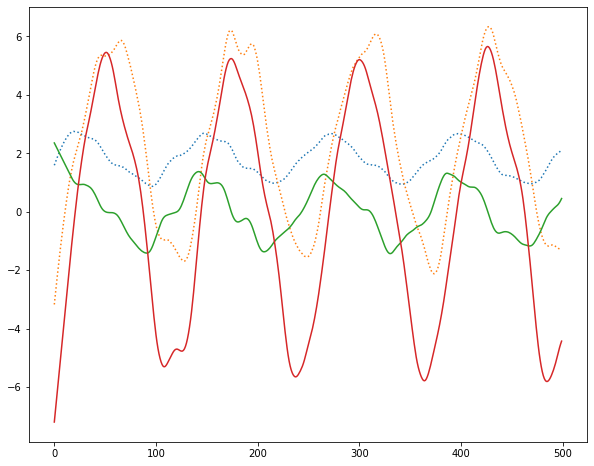

  0%|          | 0/440 [00:00<?, ?it/s]

Epoch 35


100%|██████████| 440/440 [00:03<00:00, 123.38it/s]


Epoch 35 , mean error: 1.1102811 params: [DeviceArray([[-5.9565125e+02, -1.5955399e+03],
             [-2.6732225e+00, -6.3402114e+03]], dtype=float32), DeviceArray([[216.73468 , -29.923592],
             [945.3307  ,  39.600025]], dtype=float32), DeviceArray([[-0.07356334, -0.24792233],
             [-0.02736214, -0.33438966]], dtype=float32)]


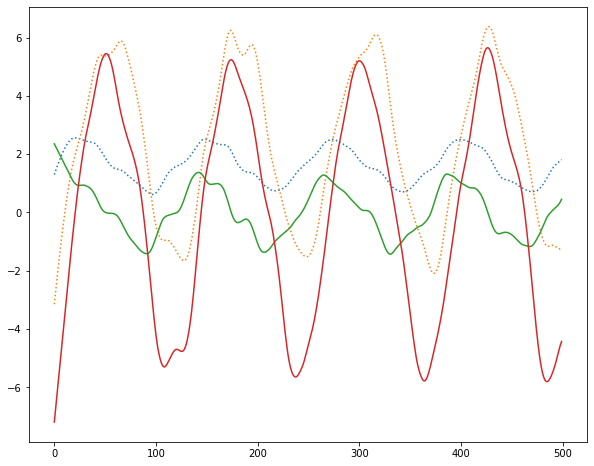

  0%|          | 0/440 [00:00<?, ?it/s]

Epoch 36


100%|██████████| 440/440 [00:03<00:00, 122.19it/s]


Epoch 36 , mean error: 1.1211925 params: [DeviceArray([[-6.1106982e+02, -1.6363579e+03],
             [-6.0921192e+00, -6.5025972e+03]], dtype=float32), DeviceArray([[216.88704 , -30.831903],
             [938.475   ,  40.388885]], dtype=float32), DeviceArray([[-0.07508884, -0.25510713],
             [ 0.12878528, -0.21093674]], dtype=float32)]


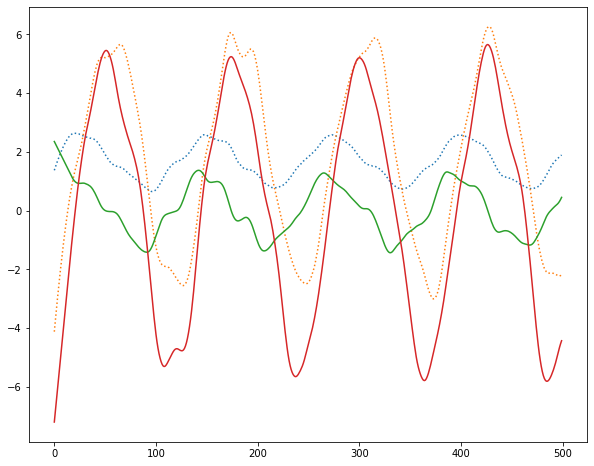

  0%|          | 0/440 [00:00<?, ?it/s]

Epoch 37


100%|██████████| 440/440 [00:03<00:00, 126.41it/s]


Epoch 37 , mean error: 0.90745944 params: [DeviceArray([[ -628.8863  , -1673.9572  ],
             [   -9.997162, -6677.995   ]], dtype=float32), DeviceArray([[210.82816 , -29.863117],
             [941.49677 ,  39.296173]], dtype=float32), DeviceArray([[ 0.25147316, -0.23115292],
             [-0.13071911, -0.3489782 ]], dtype=float32)]


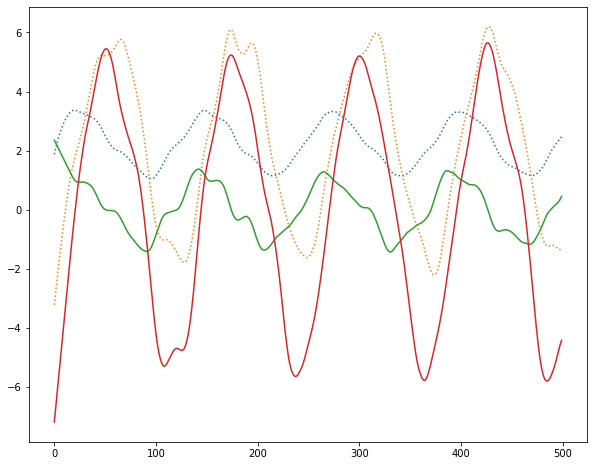

  0%|          | 0/440 [00:00<?, ?it/s]

Epoch 38


100%|██████████| 440/440 [00:03<00:00, 122.34it/s]


Epoch 38 , mean error: 0.9316843 params: [DeviceArray([[ -644.30835 , -1718.5474  ],
             [  -13.312685, -6845.6685  ]], dtype=float32), DeviceArray([[210.9501  , -30.00001 ],
             [938.3822  ,  39.439953]], dtype=float32), DeviceArray([[-0.03839658, -0.18356642],
             [-0.12034158, -0.33017382]], dtype=float32)]


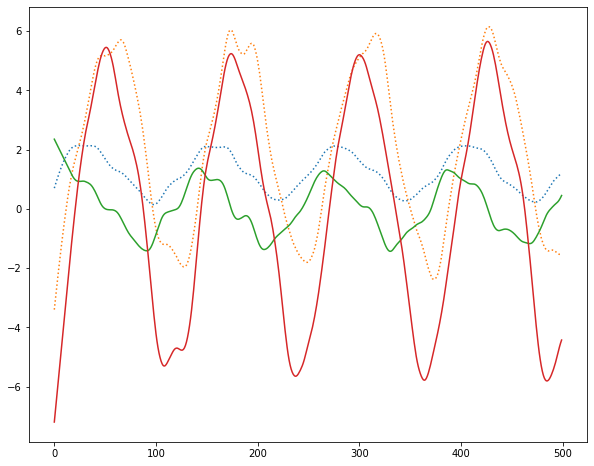

  0%|          | 0/440 [00:00<?, ?it/s]

Epoch 39


100%|██████████| 440/440 [00:03<00:00, 124.68it/s]


Epoch 39 , mean error: 1.2585713 params: [DeviceArray([[ -661.28394 , -1760.1892  ],
             [  -16.846443, -7011.631   ]], dtype=float32), DeviceArray([[211.79938 , -29.110312],
             [935.45    ,  39.430023]], dtype=float32), DeviceArray([[ 0.00825691, -0.19155076],
             [-0.11634921, -0.33007586]], dtype=float32)]


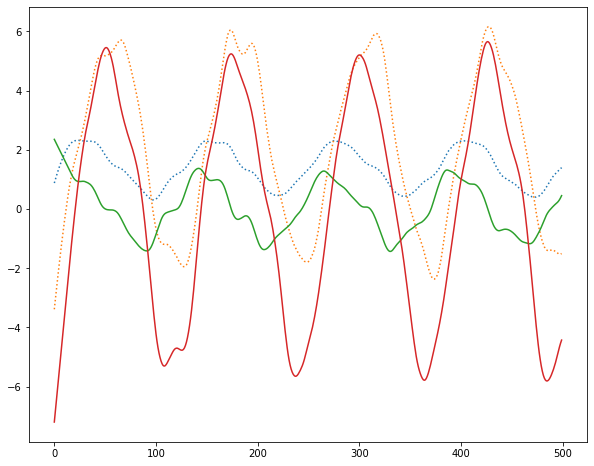

  0%|          | 0/440 [00:00<?, ?it/s]

Epoch 40


100%|██████████| 440/440 [00:03<00:00, 122.09it/s]


Epoch 40 , mean error: 0.9644806 params: [DeviceArray([[ -677.4916 , -1802.0907 ],
             [  -20.35218, -7176.251  ]], dtype=float32), DeviceArray([[211.79442 , -30.341091],
             [932.5241  ,  39.421173]], dtype=float32), DeviceArray([[ 0.0343871 , -0.26008233],
             [-0.11011423, -0.33019826]], dtype=float32)]


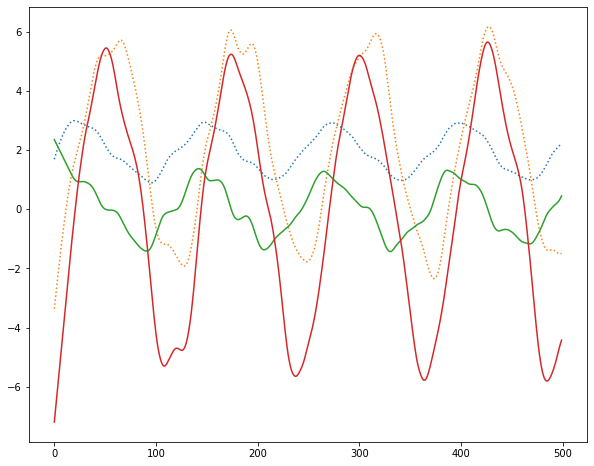

  0%|          | 0/440 [00:00<?, ?it/s]

Epoch 41


100%|██████████| 440/440 [00:03<00:00, 121.00it/s]


Epoch 41 , mean error: 1.0139495 params: [DeviceArray([[ -692.99615, -1842.5363 ],
             [  -23.80793, -7339.743  ]], dtype=float32), DeviceArray([[208.87993 , -29.527594],
             [929.5757  ,  39.41377 ]], dtype=float32), DeviceArray([[ 0.03823418, -0.24316236],
             [-0.10563378, -0.3301259 ]], dtype=float32)]


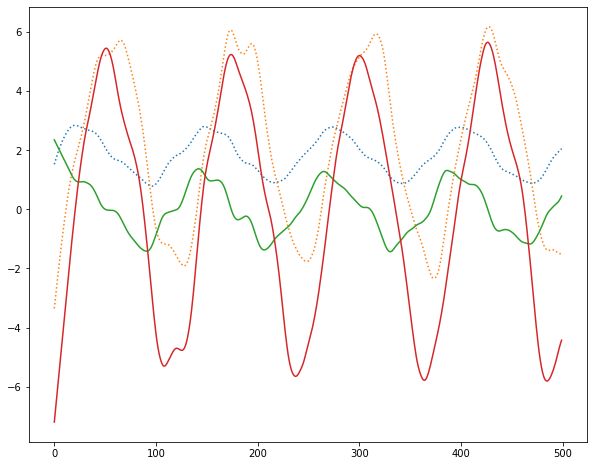

  0%|          | 0/440 [00:00<?, ?it/s]

Epoch 42


100%|██████████| 440/440 [00:03<00:00, 119.18it/s]


Epoch 42 , mean error: 1.1842065 params: [DeviceArray([[ -708.32184 , -1883.0289  ],
             [  -27.241817, -7502.3745  ]], dtype=float32), DeviceArray([[208.88544 , -29.143322],
             [926.6469  ,  39.403328]], dtype=float32), DeviceArray([[ 0.2585628 , -0.14989683],
             [-0.0999736 , -0.33008856]], dtype=float32)]


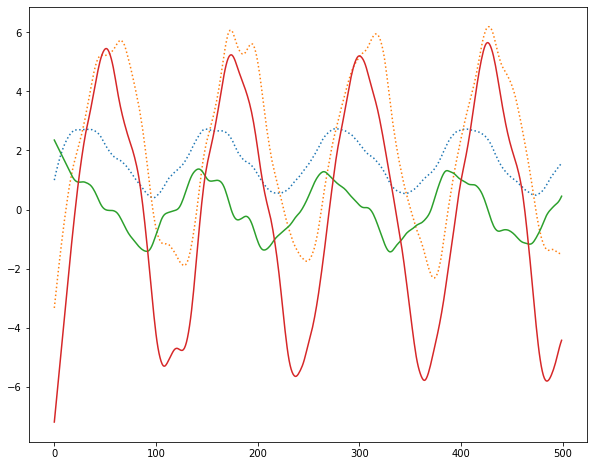

  0%|          | 0/440 [00:00<?, ?it/s]

Epoch 43


100%|██████████| 440/440 [00:03<00:00, 120.24it/s]


Epoch 43 , mean error: 0.80421025 params: [DeviceArray([[ -724.3486  , -1925.7073  ],
             [  -30.637005, -7664.204   ]], dtype=float32), DeviceArray([[210.16617 , -30.122013],
             [923.71356 ,  39.392426]], dtype=float32), DeviceArray([[-0.34044498, -0.13752872],
             [-0.09476402, -0.33014268]], dtype=float32)]


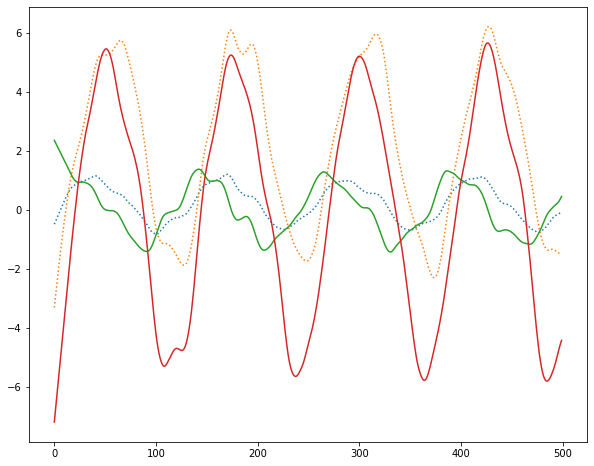

  0%|          | 0/440 [00:00<?, ?it/s]

Epoch 44


100%|██████████| 440/440 [00:03<00:00, 116.27it/s]


Epoch 44 , mean error: 0.9692122 params: [DeviceArray([[ -739.9084  , -1963.6174  ],
             [  -34.005016, -7825.3438  ]], dtype=float32), DeviceArray([[206.81438 , -28.694515],
             [920.79083 ,  39.37888 ]], dtype=float32), DeviceArray([[-0.29722992, -0.17659035],
             [-0.08827941, -0.33020866]], dtype=float32)]


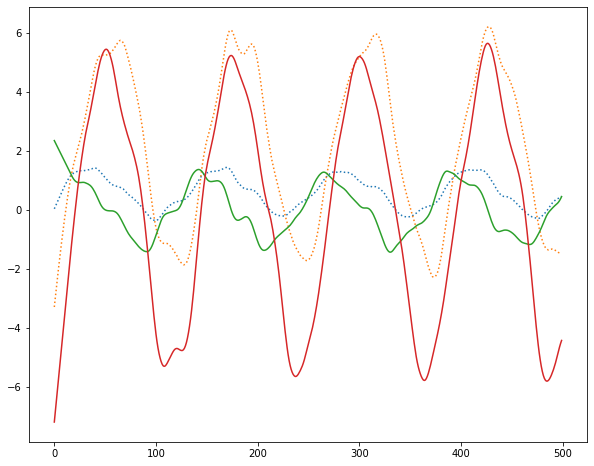

  0%|          | 0/440 [00:00<?, ?it/s]

Epoch 45


100%|██████████| 440/440 [00:03<00:00, 117.15it/s]


Epoch 45 , mean error: 1.4346036 params: [DeviceArray([[ -760.10895, -2000.1653 ],
             [  -37.32808, -7985.7847 ]], dtype=float32), DeviceArray([[207.67455 , -29.301243],
             [917.8531  ,  39.36447 ]], dtype=float32), DeviceArray([[ 0.05807872, -0.21781385],
             [-0.0819663 , -0.3305316 ]], dtype=float32)]


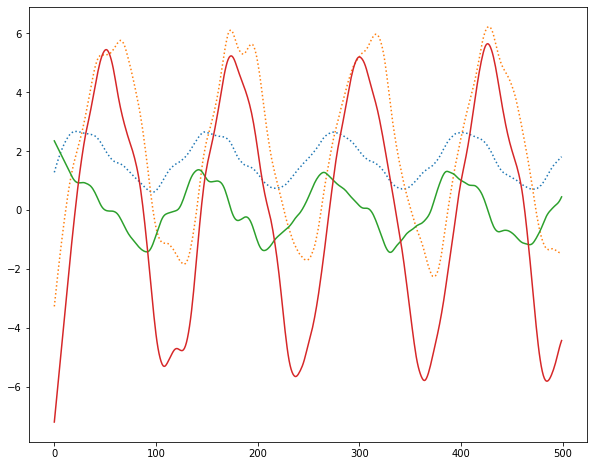

  0%|          | 0/440 [00:00<?, ?it/s]

Epoch 46


100%|██████████| 440/440 [00:03<00:00, 119.10it/s]


Epoch 46 , mean error: 0.9359156 params: [DeviceArray([[ -776.25366 , -2043.516   ],
             [  -40.627476, -8145.6436  ]], dtype=float32), DeviceArray([[207.0092  , -30.142164],
             [914.9323  ,  39.347244]], dtype=float32), DeviceArray([[ 0.01206756, -0.25597635],
             [-0.07251891, -0.33042797]], dtype=float32)]


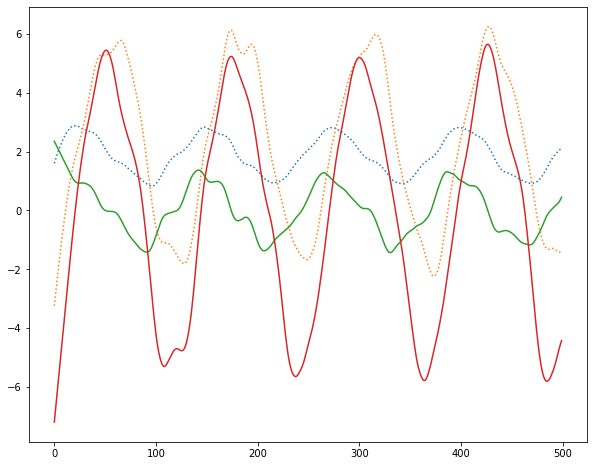

  0%|          | 0/440 [00:00<?, ?it/s]

Epoch 47


100%|██████████| 440/440 [00:03<00:00, 119.14it/s]


Epoch 47 , mean error: 1.0771058 params: [DeviceArray([[ -794.588   , -2086.0283  ],
             [  -43.849762, -8304.79    ]], dtype=float32), DeviceArray([[205.0965  , -28.438692],
             [911.95917 ,  39.332348]], dtype=float32), DeviceArray([[ 0.09731627, -0.2439485 ],
             [-0.06386936, -0.33101442]], dtype=float32)]


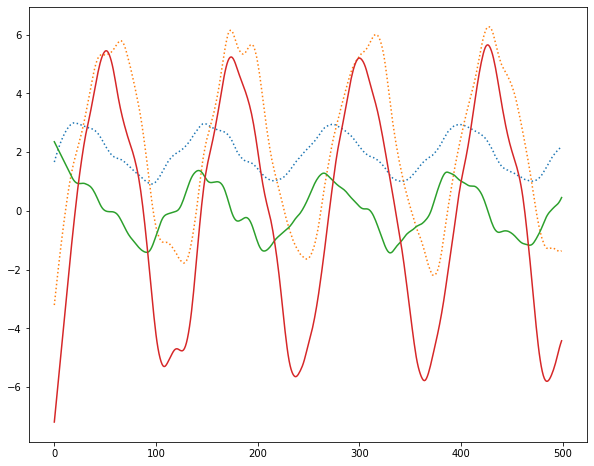

  0%|          | 0/440 [00:00<?, ?it/s]

Epoch 48


100%|██████████| 440/440 [00:03<00:00, 124.70it/s]


Epoch 48 , mean error: 1.0263257 params: [DeviceArray([[ -810.1582  , -2130.9707  ],
             [  -47.093563, -8463.72    ]], dtype=float32), DeviceArray([[206.71373 , -29.02431 ],
             [909.1615  ,  39.327618]], dtype=float32), DeviceArray([[ 0.20067297, -0.18082176],
             [-0.0450936 , -0.32704815]], dtype=float32)]


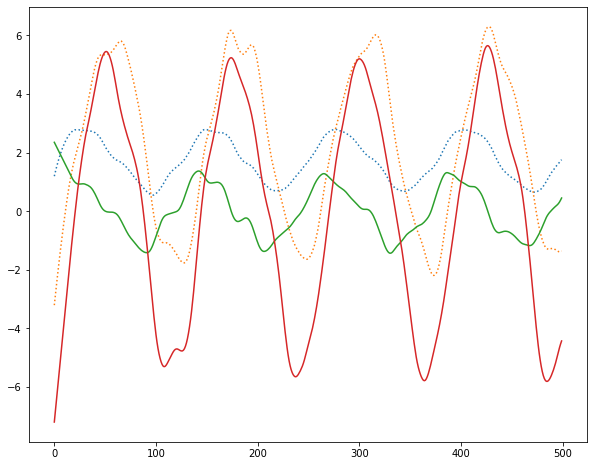

  0%|          | 0/440 [00:00<?, ?it/s]

Epoch 49


100%|██████████| 440/440 [00:03<00:00, 122.66it/s]


Epoch 49 , mean error: 0.88475025 params: [DeviceArray([[ -826.5818  , -2169.9958  ],
             [  -49.849136, -8620.555   ]], dtype=float32), DeviceArray([[205.2508  , -29.946623],
             [905.63226 ,  39.324978]], dtype=float32), DeviceArray([[-0.09149054, -0.21464108],
             [-0.04819229, -0.3428437 ]], dtype=float32)]


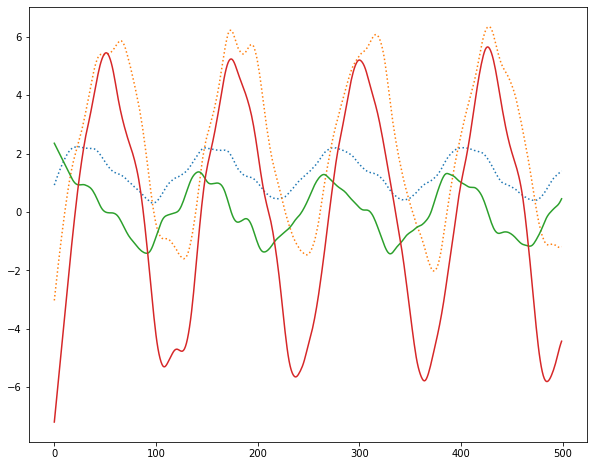

In [189]:


def callback(y_pred, y_true):
    
    plt.figure(figsize=(10, 8))
    plt.plot(shuffler.undo_shuffle(np.squeeze(y_pred))[:500], linestyle="dotted")
    plt.plot(shuffler.undo_shuffle(np.squeeze(y_true))[:500])
    plt.show()


train(params, q_shuffled, q_dot_shuffled, q_dot2_shuffled, f_shuffled, batch_size=128, optimizer=adam, step_size=1e1, epochs=50, callback=callback, batch_forward_pass=batch_forward_pass)